# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
import csv
from citipy import citipy

# Import API key
import sys
sys.path.append('../../..')
from api_keys import api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [20]:
# start api call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# params 
city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

print("Beginning Data Retrieval")
counter = 0

# perform multiple api calls and exception handle
for city in cities:   
    try:
        counter += 1
        if counter % 55 == 0:
            time.sleep(60)

        print("----------------------")
        print("Processing Record " + str(counter) + " | " + city)
        city = city.replace(" ","%20")
        response = requests.get(query_url + city).json()
        
        #api calls
        cloudiness_data.append(response.get("clouds").get("all"))
        country_data.append(response.get("sys").get("country"))
        date_data.append(response.get("dt"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        max_temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))
        city_data.append(response.get("name")) # city is last for better error handling

    except:
        print("City not found. Skipping...")

print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
----------------------
Processing Record 1 | puerto ayora
----------------------
Processing Record 2 | narrabri
----------------------
Processing Record 3 | tukrah
City not found. Skipping...
----------------------
Processing Record 4 | lere
----------------------
Processing Record 5 | never
----------------------
Processing Record 6 | angoche
----------------------
Processing Record 7 | amderma
City not found. Skipping...
----------------------
Processing Record 8 | kapaa
----------------------
Processing Record 9 | sechura
----------------------
Processing Record 10 | ilulissat
----------------------
Processing Record 11 | sola
----------------------
Processing Record 12 | bluff
----------------------
Processing Record 13 | albany
----------------------
Processing Record 14 | pangnirtung
----------------------
Processing Record 15 | jamestown
----------------------
Processing Record 16 | warqla
City not found. Skipping...
----------------------
Processing Rec

----------------------
Processing Record 139 | evans
----------------------
Processing Record 140 | kutum
----------------------
Processing Record 141 | mar del plata
----------------------
Processing Record 142 | tuatapere
----------------------
Processing Record 143 | vaitupu
City not found. Skipping...
----------------------
Processing Record 144 | ahipara
----------------------
Processing Record 145 | vaini
----------------------
Processing Record 146 | barrow
----------------------
Processing Record 147 | hermanus
----------------------
Processing Record 148 | saint-pierre
----------------------
Processing Record 149 | kitimat
----------------------
Processing Record 150 | sorgun
----------------------
Processing Record 151 | castro
----------------------
Processing Record 152 | monrovia
----------------------
Processing Record 153 | chuy
----------------------
Processing Record 154 | khonuu
City not found. Skipping...
----------------------
Processing Record 155 | upernavik
-----

----------------------
Processing Record 279 | ouesso
----------------------
Processing Record 280 | singkawang
City not found. Skipping...
----------------------
Processing Record 281 | cayenne
----------------------
Processing Record 282 | nueva guinea
----------------------
Processing Record 283 | donghai
----------------------
Processing Record 284 | sal rei
----------------------
Processing Record 285 | bargal
City not found. Skipping...
----------------------
Processing Record 286 | lanivtsi
----------------------
Processing Record 287 | toulepleu
City not found. Skipping...
----------------------
Processing Record 288 | maputo
----------------------
Processing Record 289 | mehamn
----------------------
Processing Record 290 | touros
----------------------
Processing Record 291 | kismayo
City not found. Skipping...
----------------------
Processing Record 292 | zyryanka
----------------------
Processing Record 293 | casalmaggiore
----------------------
Processing Record 294 | hoq

----------------------
Processing Record 417 | miramar
----------------------
Processing Record 418 | waipawa
----------------------
Processing Record 419 | barcelona
----------------------
Processing Record 420 | krasnyy chikoy
----------------------
Processing Record 421 | nouadhibou
----------------------
Processing Record 422 | poum
----------------------
Processing Record 423 | pakokku
----------------------
Processing Record 424 | farmington
----------------------
Processing Record 425 | pacific grove
----------------------
Processing Record 426 | tonantins
----------------------
Processing Record 427 | sabya
----------------------
Processing Record 428 | kalabo
----------------------
Processing Record 429 | bambous virieux
----------------------
Processing Record 430 | la romana
----------------------
Processing Record 431 | vestmannaeyjar
----------------------
Processing Record 432 | gambela
----------------------
Processing Record 433 | hualmay
----------------------
Processi

----------------------
Processing Record 559 | lengshuijiang
----------------------
Processing Record 560 | solnechnyy
----------------------
Processing Record 561 | nguiu
City not found. Skipping...
----------------------
Processing Record 562 | zaidpur
----------------------
Processing Record 563 | itupiranga
----------------------
Processing Record 564 | beruwala
----------------------
Processing Record 565 | mitsamiouli
----------------------
Processing Record 566 | lashio
----------------------
Processing Record 567 | umm lajj
----------------------
Processing Record 568 | keflavik
----------------------
Processing Record 569 | kalmunai
----------------------
Processing Record 570 | pochutla
----------------------
Processing Record 571 | muisne
----------------------
Processing Record 572 | olinda
----------------------
Processing Record 573 | turinsk
----------------------
Processing Record 574 | pekan
----------------------
Processing Record 575 | andevoranto
City not found. Ski

### Convert Raw Data to DataFrame

In [21]:
len(city_data)

553

In [22]:
# this is the method if I'm not importing data from CSV, but using the lists to compile json data instead
weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1548716400,70,-0.74,-90.35,84.20,13.87
1,Narrabri,24,AU,1548716400,39,-30.33,149.78,84.20,18.34
2,Lere,8,TD,1548719345,32,9.66,14.23,69.57,8.75
3,Never,68,RU,1548719345,84,53.98,124.16,-6.75,2.59
4,Angoche,68,MZ,1548719345,100,-16.23,39.91,81.23,12.33


In [23]:
# write weather data to a csv
weather_data.to_csv("Output/weather_data.csv")

In [24]:
weather_data = pd.read_csv("Output/weather_data.csv")
weather_data.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Puerto Ayora,20,EC,1548716400,70,-0.74,-90.35,84.20,13.87
1,1,Narrabri,24,AU,1548716400,39,-30.33,149.78,84.20,18.34
2,2,Lere,8,TD,1548719345,32,9.66,14.23,69.57,8.75
3,3,Never,68,RU,1548719345,84,53.98,124.16,-6.75,2.59
4,4,Angoche,68,MZ,1548719345,100,-16.23,39.91,81.23,12.33


---
### Plotting the Data -- Please beware that I am experimenting with color!
---

#### Latitude vs. Temperature Plot

In [40]:
# format date for plot titles
import datetime
date = datetime.datetime.now().date()
print(date)

2019-01-28


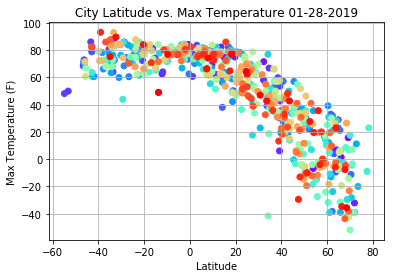

In [116]:
# Build a scatter plot for each data type
x = weather_data["Lat"]
y = weather_data["Max Temp"]
xy = range(100)
z = xy
colors = cm.rainbow(np.linspace(0, 1, len(x)))
sc = plt.scatter(x, y, vmin=0, vmax=100, color=colors)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + date.strftime("%m-%d-%Y"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output/CityLat_vs_Max_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

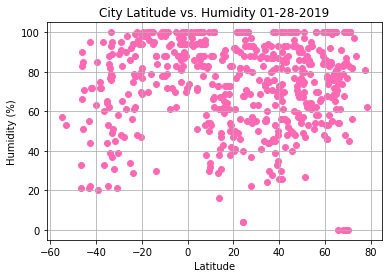

In [117]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], c='hotpink')
plt.title("City Latitude vs. Humidity " + date.strftime("%m-%d-%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output/CityLat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

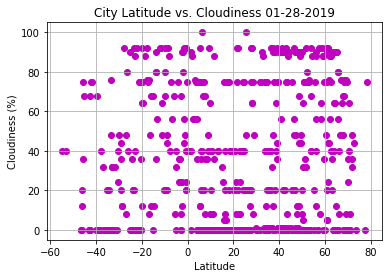

In [118]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], c="m")
plt.title("City Latitude vs. Cloudiness " + date.strftime("%m-%d-%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output/CityLat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

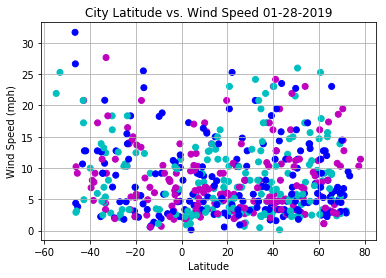

In [119]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], c="mcb")
plt.title("City Latitude vs. Wind Speed " + date.strftime("%m-%d-%Y"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output/CityLat_vs_Wind_Speed.png")

plt.show()